<a href="https://colab.research.google.com/github/factwy/Study_ML/blob/main/05_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 5. K-Means

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PythonMLWorkspace/ScikitLearn/KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [41]:
X = dataset.iloc[:, :].values
# X = dataset.values
# X = dataset.to_numpy() # 공식 홈페이지 권장 방식
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체 데이터 분포 확인)

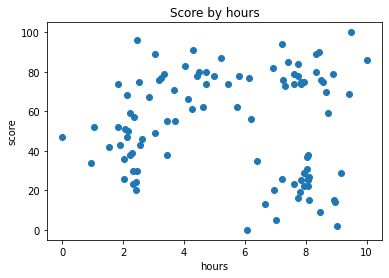

In [42]:
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (축 범위 통일)

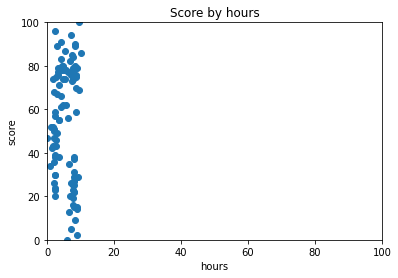

In [43]:
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 피처 스케일링 (Feature Scaling)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링된 데이터)

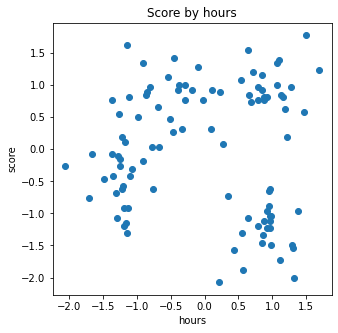

In [45]:
plt.figure(figsize = (5, 5))
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 최적의 K 값 찾기 (엘보우 방식 Elbow Method)

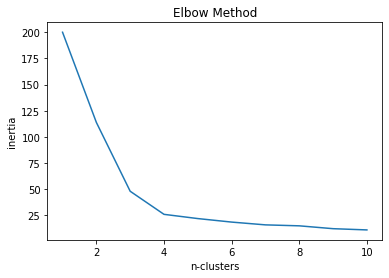

In [50]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 0)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_) # 각 지점으로 부터 클러스터의 중심(Centroid) 까지의 거리의 제곱의 합

plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n-clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 K (4) 값으로 KMeans 학습

In [52]:
K = 4 # 최적의 K 값

In [54]:
kmeans = KMeans(n_clusters = K, init = 'k-means++', n_init = 10, random_state = 0)
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

### 데이터 시각화 (최적의 K)

In [56]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 (centroid) 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

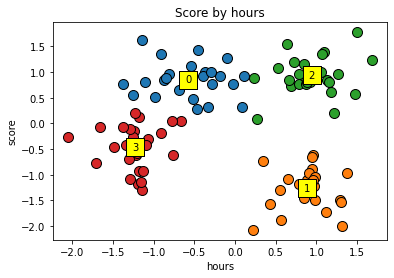

In [58]:
for cluster in range(K):
  plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s = 100, edgecolor = 'black') # 각 데이터
  plt.scatter(centers[cluster, 0], centers[cluster, 1], s = 300, edgecolor = 'black', color = 'yellow', marker = 's') # 중심점 네모
  plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va = 'center', ha = 'center') # 클러스터 텍스트 출력

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (스케일링 원복)

In [59]:
X_org = sc.inverse_transform(X) # Feature Scaling 된 데이터를 다시 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [60]:
centers_org = sc.inverse_transform(centers)
centers_org[:5]

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

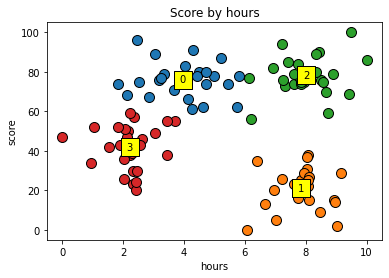

In [61]:
for cluster in range(K):
  plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s = 100, edgecolor = 'black') # 각 데이터
  plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s = 300, edgecolor = 'black', color = 'yellow', marker = 's') # 중심점 네모
  plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va = 'center', ha = 'center') # 클러스터 텍스트 출력

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()